<a href="https://colab.research.google.com/github/Vusumuzi2Mabasa/BioHack2022/blob/main/Biohack_2022_Drug_adverse_event_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UPLOADING DATASET(AID 492950) OBTAINED FROM PUBCHEM DATABASE
The dataset was curated manually in excel. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TB.xlsx to TB.xlsx


#READING THE EXCEL FILE CONTAINING CANONICAL SMILES in Python

The simplified molecular-input line-entry system (SMILES) is a specification used to translate a chemical's three-dimensional structure into a string of symbols that can be easily used for machine learning purposes.


In [ ]:
import pandas as pd

df2 = pd.read_excel('TB.xlsx')
df2

,Class,canonical_smiles
0,Active,CC1=CC(=CC(=C1)CN2C(=O)C(=C(C=N2)Cl)Cl)C
1,Active,CC1=CC=CC=C1N2C3=C(C=N2)C(=CC(=C3)[N+](=O)[O-]...
2,Active,C1=CSC(=C1)C=C2C(=O)N(C(=S)S2)CCCC(=O)NC3=CC=C...
3,Active,CC1=CC=C(C=C1)CS(=O)(=O)C2=NC=C(C(=N2)C(=O)NC3...
4,Active,CC(C)C1=NN=C(S1)NC(=O)C2=NC(=NC=C2Cl)S(=O)(=O)...
...,...,...
125,Inactive,CN1C(=C(C(=O)N(C1=O)C)C2=NN(C(C2)C3=CC=CC=C3)C...
126,Inactive,CC1=C(SC=C1)C=NNC(=O)CC2=CC(=O)NN2
127,Inactive,C1=CC(=CC=C1C2=CC(=O)NN2)Br
128,Inactive,CC(=NNC(=O)CC1=CC(=O)NN1)C2=CC(=CC=C2)[N+](=O)...


#EXPLORATORY DATA ANALYSIS & DATA PRE-PROCESSING

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.pyplot as pp
import pandas.plotting


Text(0.5, 1.0, 'TB cytotoxicity')

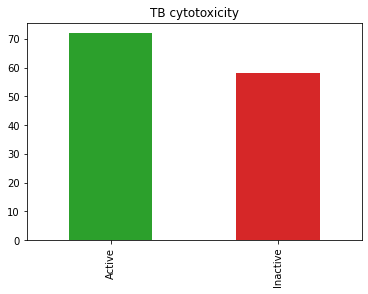

In [ ]:
df2.Class.value_counts().plot(kind="bar", color=["C2","C3"]); pp.title("TB cytotoxicity")

In [ ]:
df_class = df2.drop(columns='canonical_smiles')
df_class

,Class
0,Active
1,Active
2,Active
3,Active
4,Active
...,...
125,Inactive
126,Inactive
127,Inactive
128,Inactive


#PaDELPy LIBRARY INSTALLATION
*PaDELpy is an open-source library that provides a Python wrapper for the PaDEL-descriptor calculation software*

In [ ]:
! pip install padelpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2022-08-24 10:17:11--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2022-08-24 10:17:11--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2022-08-24 10:17:11 (84.3 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

#CREATING A FINGERPRINT LIST FROM PaDELpy

In [ ]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
FP_list = ['AtomPairs2DCount',
           'AtomPairs2D',
           'EState',
           'CDKextended',
           'CDK',
           'CDKgraphonly',
           'KlekotaRothCount',
           'KlekotaRoth',
           'MACC',
           'Pubchem',
           'SubstructureCount',
           'Substructure']

In [ ]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACC': 'MACCSFingerprinter.xml',
 'Pubchem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [ ]:
selection = ['canonical_smiles','Class']
df3_selection = df2[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)


In [ ]:
! cat molecule.smi | head -5

CC1=CC(=CC(=C1)CN2C(=O)C(=C(C=N2)Cl)Cl)C	Active
CC1=CC=CC=C1N2C3=C(C=N2)C(=CC(=C3)[N+](=O)[O-])[N+](=O)[O-]	Active
C1=CSC(=C1)C=C2C(=O)N(C(=S)S2)CCCC(=O)NC3=CC=C(C=C3)O	Active
CC1=CC=C(C=C1)CS(=O)(=O)C2=NC=C(C(=N2)C(=O)NC3=NN=C(S3)C(C)C)Cl	Active
CC(C)C1=NN=C(S1)NC(=O)C2=NC(=NC=C2Cl)S(=O)(=O)CC3=CC=C(C=C3)F	Active


#MOLECULAR FINGERPRINT CALCULATION USING AtomPairs2DCount

In [ ]:
from padelpy import padeldescriptor
fingerprint = 'AtomPairs2DCount'
Atom_output_file = ''.join([fingerprint, '.excel']) #'.csv'
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                  d_file=Atom_output_file,#'AtomPairs2Dcount.csv'
                  #descriptortypes='AtomFingerprint.xml'),
                  descriptortypes= fingerprint_descriptortypes,
                  detectaromaticity=True,
                  standardizenitro=True,
                  standardizetautomers=True,
                  threads=2,
                  removesalt=True,
                  log=True,
                  fingerprints=True)

Reading AtomPairs2DCount in a dataframe

In [ ]:
Descriptors =pd.read_csv(Atom_output_file)
Descriptors

,Name,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,...,APC2D10_I_I,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X
0,Active,12.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Active,14.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Active,15.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Active,14.0,8.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Active,13.0,8.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Inactive,9.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,Inactive,18.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,Inactive,9.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,Inactive,12.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Atom = Descriptors.drop(columns='Name')
Atom

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_I,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X
0,12.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.0,8.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,8.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,9.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,18.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,9.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,12.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Combining dataframes

In [ ]:
df_combined = pd.concat([Atom, df_class], axis=1)
df_combined

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X,Class
0,12.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Active
1,14.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Active
2,15.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Active
3,14.0,8.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Active
4,13.0,8.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,9.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Inactive
126,18.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Inactive
127,9.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Inactive
128,12.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Inactive


# Machine Learning model using R
*Converting a python dataframe into R dataframe (PACKAGE INSTALLATION)*

In [ ]:
!pip install rpy2

In [ ]:
!pip install ipython

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("tidyverse")


In [ ]:
%%R
install.packages("caret")


In [ ]:

%%R
install.packages("randomForest")


In [ ]:
%%R
library(tidyverse)
library(caret)
library(randomForest)

#Copying Python dataframe to R

In [ ]:
%R -i df_combined
df_combined

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X,Class
0,12.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Active
1,14.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Active
2,15.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Active
3,14.0,8.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Active
4,13.0,8.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,9.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Inactive
126,18.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Inactive
127,9.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Inactive
128,12.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Inactive


#REMOVING REDUNDANT FEATURES FROM THE R DATASET

In [ ]:
%%R
df_combined[['Class']] <- as.factor(df_combined[['Class']])


In [ ]:
%%R
df_combined <- df_combined %>% select(where(~n_distinct(.)>1))


Remaining features after removing redundant ones

In [ ]:
%%R
dim(df_combined)

[1] 130 249


#PERFORMING STRATIFIED RANDOM SPLIT OF THE DATASET

In [ ]:
%%R

TrainingIndex <- createDataPartition(df_combined[['Class']], p=0.8, list = F)
Trainingset <- df_combined[TrainingIndex,]
Testingset <- df_combined[-TrainingIndex,]

#BUILDING A RANDOM-FOREST MACHINE LEARNING MODEL
The random forest is a supervised machine learning algorithm consisting of many decisions trees widely used in classification or regression problems (Analytics Vidhya - https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/).

*Training model*

In [ ]:
%%R
model.training <-randomForest(Class ~ ., data = Trainingset, ntree = 100, mtry = 4, importance = TRUE)

*Testing model*

In [ ]:
%%R
model.testing <- randomForest(Class ~ ., data = Testingset, ntree = 100, mtry = 4, importance = T)

*Cross-validation (CV) model*

In [ ]:
%%R
model.cv <- randomForest(Class ~ ., data = Trainingset, ntree = 100, mtry = 4, importance = TRUE,trControl= trainControl(method = "cv",number = 10) )

#APPLYING DEVELOPED MODELS FOR PREDICTION

In [ ]:
%%R
model.training2 <- predict(model.training, Trainingset)


In [ ]:
%%R
model.testing2 <- predict(model.testing, Testingset)


In [ ]:
%%R
model.cv2 <- predict(model.cv, Trainingset)

#MODEL PERFORMANCE *(display confusion matrix and statistics)*

In [ ]:
%%R
model.training.confusion <- confusionMatrix(model.training2, as.factor (Trainingset[['Class']]))


In [ ]:
%%R
model.testing.confusion <- confusionMatrix(model.testing2, as.factor(Testingset[['Class']]))

In [ ]:
%%R
model.cv.confusion <- confusionMatrix(model.cv2, as.factor (Trainingset[['Class']]))

#PRINT MODELS

In [ ]:
%%R
print(model.training.confusion)

Confusion Matrix and Statistics

          Reference
Prediction Active Inactive
  Active       57        0
  Inactive      1       47
                                          
               Accuracy : 0.9905          
                 95% CI : (0.9481, 0.9998)
    No Information Rate : 0.5524          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9808          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9828          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9792          
             Prevalence : 0.5524          
         Detection Rate : 0.5429          
   Detection Prevalence : 0.5429          
      Balanced Accuracy : 0.9914          
                                          
       'Positive' Class : Active          
      

In [ ]:
%%R
print(model.testing.confusion)

Confusion Matrix and Statistics

          Reference
Prediction Active Inactive
  Active       14        0
  Inactive      0       11
                                     
               Accuracy : 1          
                 95% CI : (0.8628, 1)
    No Information Rate : 0.56       
    P-Value [Acc > NIR] : 5.066e-07  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.00       
            Specificity : 1.00       
         Pos Pred Value : 1.00       
         Neg Pred Value : 1.00       
             Prevalence : 0.56       
         Detection Rate : 0.56       
   Detection Prevalence : 0.56       
      Balanced Accuracy : 1.00       
                                     
       'Positive' Class : Active     
                                     


In [ ]:
%%R
print(model.cv.confusion)

Confusion Matrix and Statistics

          Reference
Prediction Active Inactive
  Active       57        0
  Inactive      1       47
                                          
               Accuracy : 0.9905          
                 95% CI : (0.9481, 0.9998)
    No Information Rate : 0.5524          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9808          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9828          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9792          
             Prevalence : 0.5524          
         Detection Rate : 0.5429          
   Detection Prevalence : 0.5429          
      Balanced Accuracy : 0.9914          
                                          
       'Positive' Class : Active          
      

#RANDOM FOREST DERIVED GINI INDEX.
The top 20 AtomPirs2DCount descriptors/features important for TB intein inhibition.

              MeanDecreaseAccuracy MeanDecreaseGini
APC2D1_C_C              1.61584672     0.6965324660
APC2D1_C_N              2.02835889     0.5611972573
APC2D1_C_O              1.72421831     0.4086158744
APC2D1_C_S              0.02577871     0.1215485008
APC2D1_C_F              0.35984331     0.0813021017
APC2D1_C_Cl             0.48139021     0.2471573923
APC2D1_C_Br             0.00000000     0.0005000000
APC2D1_C_X              2.23668482     0.5397633361
APC2D1_N_N              1.61550061     0.6358087506
APC2D1_N_O             -1.46498183     0.2267229599
APC2D1_N_S             -1.00503782     0.0254053030
APC2D1_O_S              0.64586991     0.0561519261
APC2D2_C_C              1.80843994     0.5814769060
APC2D2_C_N              0.09133085     0.5469531260
APC2D2_C_O              1.20862276     0.5297089769
APC2D2_C_S              0.61763990     0.0489734300
APC2D2_C_F              1.34894149     0.1211724349
APC2D2_C_Cl            -0.02838573     0.2508469723
APC2D2_C_Br 

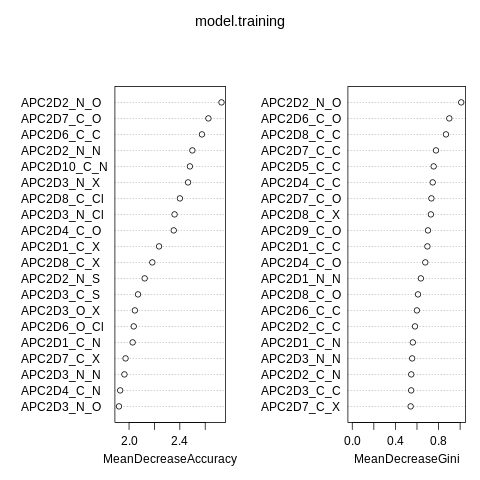

In [ ]:
%%R
importance <- varImpPlot(model.training,sort=T, n.var=20)
importance

#Development of a tool to predict risk of an adverse drug event for treatment of a common disease has been completed. 